In [35]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [36]:
# here we will create scatter plots of job_skills needed for specific job titles and plot them in scatter plots
df_copy = df[df['job_title'] == 'Data Analyst'].copy()
df_exploded = df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


Scatter Plots

In [37]:
# now making a new columns so that we can look at 3 different topic in one graph
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# limit to top 10 skills
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
skill_stats

,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


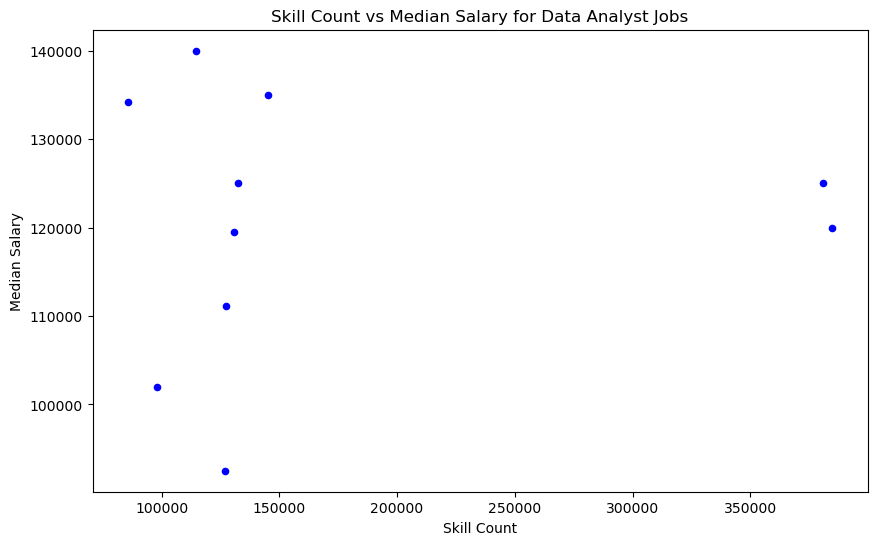

In [38]:
# now we will plot scatter plots
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(10, 6), color='blue')
plt.title('Skill Count vs Median Salary for Data Analyst Jobs')
plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.grid(False)
plt.show()

Adding anotations

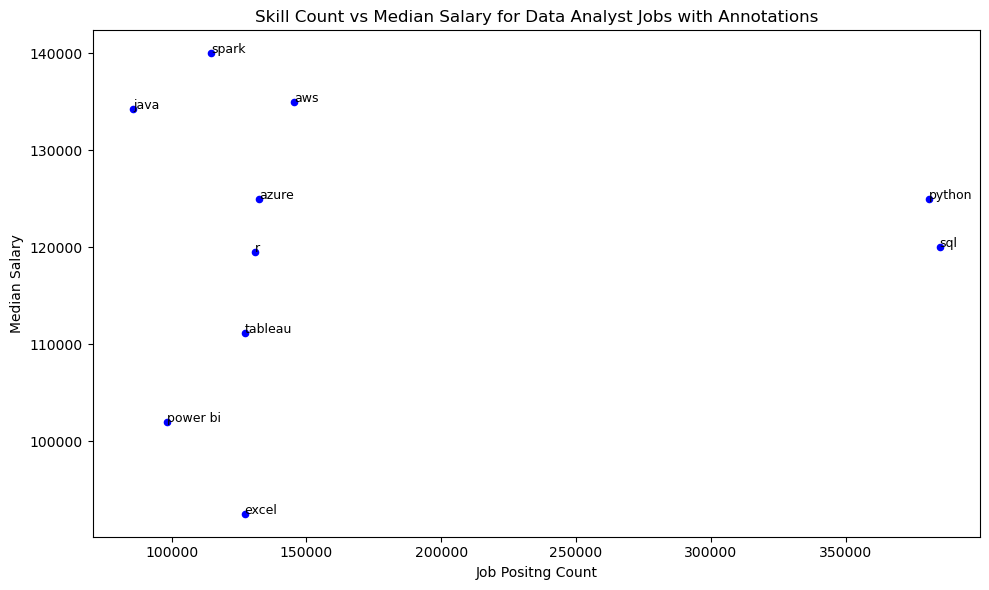

In [39]:
# we need to add anotations to the scatter plots
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(10, 6), color='blue')
for i, skill in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], skill, fontsize=9)
    #plt.annotate(skill, (skill_stats['skill_count'][i], skill_stats['median_salary'][i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Skill Count vs Median Salary for Data Analyst Jobs with Annotations')
plt.xlabel('Job Positng Count')
plt.ylabel('Median Salary')
plt.grid(False) 
plt.tight_layout()
plt.show()

exercise

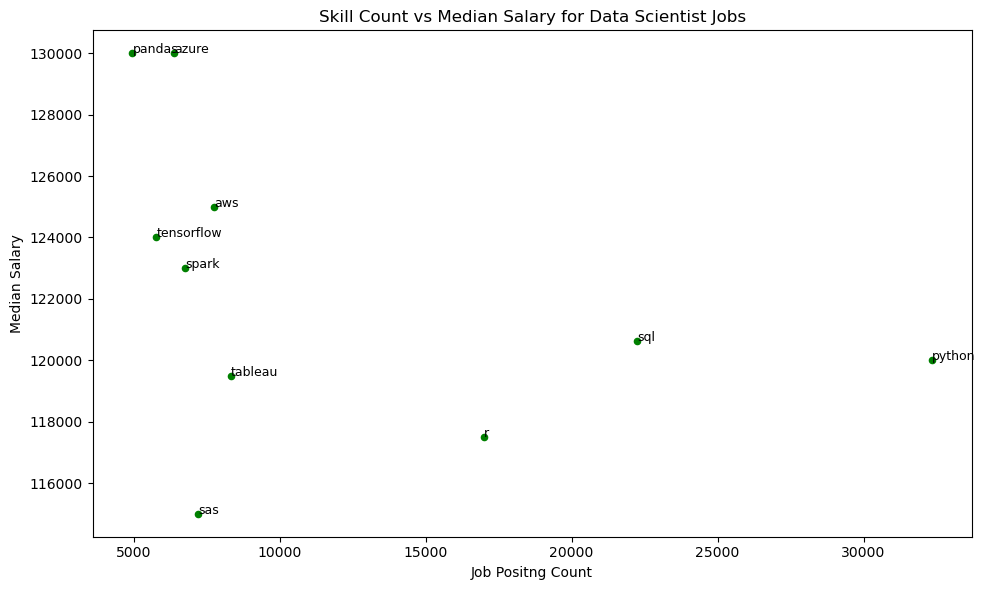

In [41]:
df_DS = df[df['job_title'] == 'Data Scientist'].copy()
df_DS_exploded = df_DS.explode('job_skills')
skill_stats_DS = df_DS_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)
skill_stats_DS = skill_stats_DS.sort_values(by='skill_count', ascending=False).head(10)
skill_stats_DS.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(10, 6), color='green')
for i, skill in enumerate(skill_stats_DS.index):
    plt.text(skill_stats_DS['skill_count'].iloc[i], skill_stats_DS['median_salary'].iloc[i], skill, fontsize=9)
plt.title('Skill Count vs Median Salary for Data Scientist Jobs')
plt.xlabel('Job Positng Count')
plt.ylabel('Median Salary')
plt.grid(False)
plt.tight_layout()
plt.show()

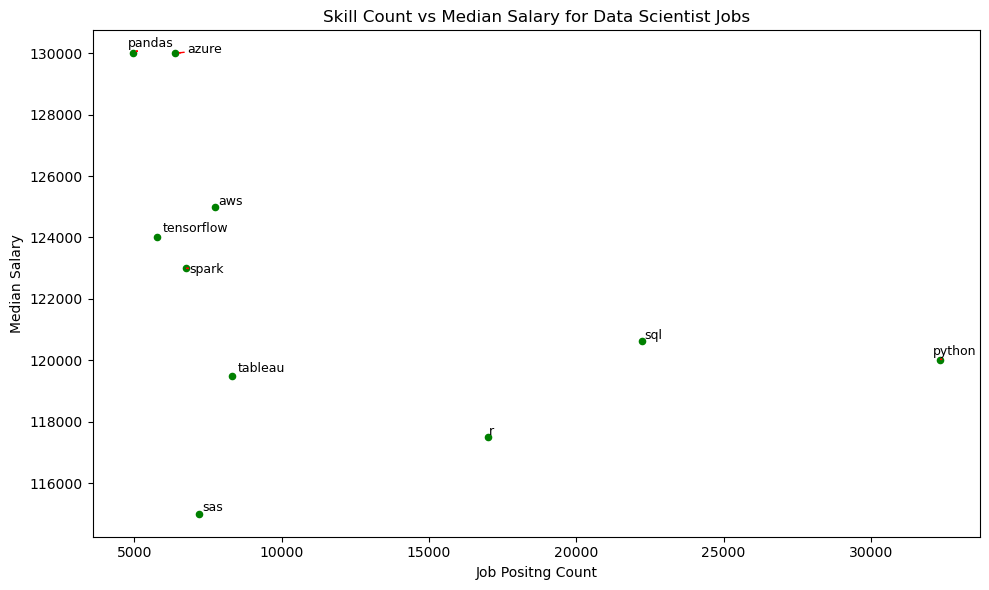

In [ ]:
from adjustText import adjust_text
df_DS = df[df['job_title'] == 'Data Scientist'].copy()
df_DS_exploded = df_DS.explode('job_skills')
skill_stats_DS = df_DS_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)
skill_stats_DS = skill_stats_DS.sort_values(by='skill_count', ascending=False).head(10)
skill_stats_DS.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(10, 6), color='green')
# Prepare texts for adjustText
texts = []
for i, skill in enumerate(skill_stats_DS.index):
    texts.append(plt.text(
        skill_stats_DS['skill_count'].iloc[i],
        skill_stats_DS['median_salary'].iloc[i], 
        skill, fontsize=9))
# Adjust text to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
plt.title('Skill Count vs Median Salary for Data Scientist Jobs')
plt.xlabel('Job Positng Count')
plt.ylabel('Median Salary')
plt.grid(False)
plt.tight_layout()
plt.show()